### Importação de Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importação do Dataset

In [2]:
red_wines = pd.read_csv('datasets/red_wines.csv')

In [3]:
red_wines.head(5)

,Description,Price,Alcohol,ratings_average,acidity,intensity,sweetness,tannin,vintage_ratings_average,continent,popular_wine,popular_vintage,rating_group
0,"This is a soft, richly layered and concentrate...",85.0,14.5,4.3,3.468246,3.143860,1.546160,2.078285,4.4,North America,0,0,4
1,A strong showing of black cherry and licorice ...,125.0,14.5,4.5,3.344858,4.749089,1.611013,3.312963,4.5,North America,1,0,4
2,This blended cuvée features the same attention...,52.0,14.2,4.2,3.883377,2.235860,1.453785,2.130269,4.2,North America,1,0,3
3,This stands apart from the other estate Pinots...,95.0,14.5,4.4,3.887788,2.400275,1.558072,2.328298,4.4,North America,0,0,3
4,This wine impresses immediately with its flavo...,100.0,14.4,4.3,3.627241,2.472972,1.557877,2.073915,4.5,North America,0,0,3


### Preprocessing
 1. Criação de dummies para o campo **continent**.
 2. Separação dos datasets entre treinamento e teste (train_test_split)
 3. Normalização dos valores usando StandardScaler

In [4]:
# 1
dummies = pd.get_dummies(red_wines['continent'], drop_first=True)
red_wines = pd.concat([red_wines, dummies], axis=1).drop('continent', axis=1)

In [5]:
# 2
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
description_vectorizer = vectorizer.fit_transform(red_wines['Description'])
descriptions = pd.DataFrame(description_vectorizer.toarray())

red_wines = pd.concat([red_wines, descriptions], axis=1).drop('Description', axis=1)

In [6]:
# 3
X = red_wines.drop('rating_group', axis=1)
y = red_wines['rating_group']

In [7]:
# 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_columns =['Price', 'Alcohol', 'ratings_average', 'acidity', 'intensity', 'sweetness',
                  'tannin', 'vintage_ratings_average']
X_train.loc[:, scaled_columns]= scaler.fit_transform(X_train.loc[:, scaled_columns])
X_test.loc[:, scaled_columns] = scaler.transform(X_test.loc[:, scaled_columns])

C:\Users\HAL9000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\HAL9000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Naive Bayes Model

In [8]:
from sklearn.naive_bayes import GaussianNB
base_model = GaussianNB()


#### GridSearch - busca pelos melhores hiperparâmetros

In [9]:
# Parâmetros
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)  
}

In [10]:
from sklearn.model_selection import GridSearchCV

nb_model = GridSearchCV(base_model,param_grid=param_grid, verbose=4)
nb_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..............................var_smoothing=1.0; total time=  22.3s
[CV 2/5] END ..............................var_smoothing=1.0; total time=  16.8s
[CV 3/5] END ..............................var_smoothing=1.0; total time=  18.4s
[CV 4/5] END ..............................var_smoothing=1.0; total time=  18.2s
[CV 5/5] END ..............................var_smoothing=1.0; total time=  17.6s
[CV 1/5] END ...............var_smoothing=0.8111308307896871; total time=  16.9s
[CV 2/5] END ...............var_smoothing=0.8111308307896871; total time=  16.8s
[CV 3/5] END ...............var_smoothing=0.8111308307896871; total time=  18.1s
[CV 4/5] END ...............var_smoothing=0.8111308307896871; total time=  17.9s
[CV 5/5] END ...............var_smoothing=0.8111308307896871; total time=  18.0s
[CV 1/5] END ................var_smoothing=0.657933224657568; total time=  17.9s
[CV 2/5] END ................var_smoothing=0.6

[CV 2/5] END ..............var_smoothing=0.01519911082952933; total time=  20.7s
[CV 3/5] END ..............var_smoothing=0.01519911082952933; total time=  20.3s
[CV 4/5] END ..............var_smoothing=0.01519911082952933; total time=  20.4s
[CV 5/5] END ..............var_smoothing=0.01519911082952933; total time=  20.6s
[CV 1/5] END .............var_smoothing=0.012328467394420659; total time=  20.1s
[CV 2/5] END .............var_smoothing=0.012328467394420659; total time=  21.1s
[CV 3/5] END .............var_smoothing=0.012328467394420659; total time=  21.3s
[CV 4/5] END .............var_smoothing=0.012328467394420659; total time=  20.8s
[CV 5/5] END .............var_smoothing=0.012328467394420659; total time=  20.6s
[CV 1/5] END .............................var_smoothing=0.01; total time=  20.4s
[CV 2/5] END .............................var_smoothing=0.01; total time=  20.8s
[CV 3/5] END .............................var_smoothing=0.01; total time=  19.2s
[CV 4/5] END ...............

[CV 4/5] END ............var_smoothing=0.0002310129700083158; total time=  20.5s
[CV 5/5] END ............var_smoothing=0.0002310129700083158; total time=  20.7s
[CV 1/5] END ............var_smoothing=0.0001873817422860383; total time=  20.5s
[CV 2/5] END ............var_smoothing=0.0001873817422860383; total time=  20.6s
[CV 3/5] END ............var_smoothing=0.0001873817422860383; total time=  20.6s
[CV 4/5] END ............var_smoothing=0.0001873817422860383; total time=  20.7s
[CV 5/5] END ............var_smoothing=0.0001873817422860383; total time=  20.3s
[CV 1/5] END ............var_smoothing=0.0001519911082952933; total time=  20.4s
[CV 2/5] END ............var_smoothing=0.0001519911082952933; total time=  22.1s
[CV 3/5] END ............var_smoothing=0.0001519911082952933; total time=  21.0s
[CV 4/5] END ............var_smoothing=0.0001519911082952933; total time=  20.8s
[CV 5/5] END ............var_smoothing=0.0001519911082952933; total time=  21.3s
[CV 1/5] END ............var

[CV 1/5] END ............var_smoothing=2.848035868435799e-06; total time=  20.3s
[CV 2/5] END ............var_smoothing=2.848035868435799e-06; total time=  20.3s
[CV 3/5] END ............var_smoothing=2.848035868435799e-06; total time=  19.4s
[CV 4/5] END ............var_smoothing=2.848035868435799e-06; total time=  20.3s
[CV 5/5] END ............var_smoothing=2.848035868435799e-06; total time=  20.3s
[CV 1/5] END ............var_smoothing=2.310129700083158e-06; total time=  20.3s
[CV 2/5] END ............var_smoothing=2.310129700083158e-06; total time=  20.6s
[CV 3/5] END ............var_smoothing=2.310129700083158e-06; total time=  20.3s
[CV 4/5] END ............var_smoothing=2.310129700083158e-06; total time=  20.4s
[CV 5/5] END ............var_smoothing=2.310129700083158e-06; total time=  20.6s
[CV 1/5] END ............var_smoothing=1.873817422860383e-06; total time=  20.3s
[CV 2/5] END ............var_smoothing=1.873817422860383e-06; total time=  20.2s
[CV 3/5] END ............var

[CV 3/5] END ...........var_smoothing=4.3287612810830526e-08; total time=  26.8s
[CV 4/5] END ...........var_smoothing=4.3287612810830526e-08; total time=  25.4s
[CV 5/5] END ...........var_smoothing=4.3287612810830526e-08; total time=  24.7s
[CV 1/5] END ...........var_smoothing=3.5111917342151277e-08; total time=  24.5s
[CV 2/5] END ...........var_smoothing=3.5111917342151277e-08; total time=  22.1s
[CV 3/5] END ...........var_smoothing=3.5111917342151277e-08; total time=  22.9s
[CV 4/5] END ...........var_smoothing=3.5111917342151277e-08; total time=  21.9s
[CV 5/5] END ...........var_smoothing=3.5111917342151277e-08; total time=  21.8s
[CV 1/5] END ............var_smoothing=2.848035868435799e-08; total time=  24.2s
[CV 2/5] END ............var_smoothing=2.848035868435799e-08; total time=  22.2s
[CV 3/5] END ............var_smoothing=2.848035868435799e-08; total time=  22.9s
[CV 4/5] END ............var_smoothing=2.848035868435799e-08; total time=  21.8s
[CV 5/5] END ............var

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=4)

In [11]:
nb_model.best_params_

{'var_smoothing': 1.0}

In [12]:
# Resultados
print("Best: {} using {}".format(nb_model.best_score_, nb_model.best_params_))
means = nb_model.cv_results_['mean_test_score']
stds = nb_model.cv_results_['std_test_score']
params = nb_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.5220394465718937 using {'var_smoothing': 1.0}
0.5220394465718937 (0.0064416329394258965) with: {'var_smoothing': 1.0}
0.5218449177970095 (0.005646093189087982) with: {'var_smoothing': 0.8111308307896871}
0.5199010942686396 (0.006011175653098859) with: {'var_smoothing': 0.657933224657568}
0.5190263760425191 (0.006497200052049706) with: {'var_smoothing': 0.533669923120631}
0.5164990724635627 (0.0051423235310117076) with: {'var_smoothing': 0.43287612810830584}
0.5155271370829186 (0.00577194233506396) with: {'var_smoothing': 0.3511191734215131}
0.5137290743410713 (0.004146625189181561) with: {'var_smoothing': 0.2848035868435802}
0.5122712066947939 (0.0044063280367054765) with: {'var_smoothing': 0.23101297000831597}
0.5105216639684863 (0.004272604771627036) with: {'var_smoothing': 0.1873817422860384}
0.5085291314929027 (0.003816025794523604) with: {'var_smoothing': 0.15199110829529336}
0.5074599671495051 (0.0046471770356441115) with: {'var_smoothing': 0.12328467394420659}
0.50473822

#### Avaliação do modelo

In [13]:
y_pred = nb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
train_acc = accuracy_score(y_train, nb_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print('Acurácia (treinamento): {}'.format(train_acc))
print('Acurácia (teste): {}'.format(test_acc))

Acurácia (treinamento): 0.5222335617436944
Acurácia (teste): 0.536341988887629


Text(0.5, 1.0, 'Matriz de confusão - Naive Bayes Classifier Model')

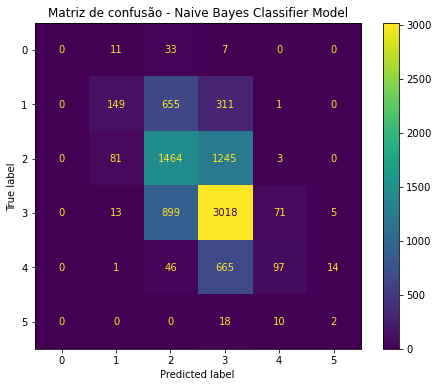

In [14]:
# Gráfico de matriz de confusão
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(nb_model, X_test,y_test, ax=ax)
plt.title('Matriz de confusão - Naive Bayes Classifier Model')

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.58      0.13      0.22      1116
           2       0.47      0.52      0.50      2793
           3       0.57      0.75      0.65      4006
           4       0.53      0.12      0.19       823
           5       0.10      0.07      0.08        30

    accuracy                           0.54      8819
   macro avg       0.38      0.27      0.27      8819
weighted avg       0.53      0.54      0.50      8819



C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Exportação do modelo

In [17]:
import joblib
joblib.dump(nb_model, 'models/nb_model.joblib')


['models/nb_model.joblib']